In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
from sklearn.model_selection import train_test_split

In [2]:
#load dataset

dataset=pd.read_csv(r"D:\personal-analysis\breast-cancer-diagnostic\data.csv")

In [3]:
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#mapping function to map different string objects to integer
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [5]:
dataset=mapping(dataset,feature="diagnosis")

In [18]:
dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [6]:
#divide dataset into x(input) and y(output)
X=dataset.drop(["diagnosis"],axis=1)
y=dataset["diagnosis"]

In [7]:
#divide dataset into training set, cross validation set, and test set
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [8]:
""" This function creates a flexible neural network architecture that can be customized by changing the values in the arr array. The input array
specifies the number of neurons in each layer, with the first element indicating the number of input features and the last element indicating 
the number of output neurons. The hidden layers have ReLU activation functions, while the output layer uses a sigmoid function for binary 
classification problems. The model is trained using binary cross-entropy loss and the RMSprop optimizer.
"""
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [9]:
"""Firstly, we'll use a small model which contains 3 layers with hidden units 30, 50 and 1, that is ,a Keras Sequential model 
with 3 layers: an input layer with 30 neurons, a hidden layer with 50 neurons, and an output layer with 1 neuron.
"""
firstModel=getModel([30,50,1])

In [10]:
#Now we will create a callback function which will plot loss on each epoch end. we will override on_epch_end() method to plot the graph
#Callback là một cách để đảm bảo code nhất định không thực thi cho đến khi code khác thực hiện xong.
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

An epoch refers to a single pass of the entire training dataset through the neural network. During an epoch, the neural network receives the input data, performs forward propagation to generate predictions, calculates the loss between the predicted and actual values, and then backpropagates the error to update the model parameters. This process is repeated for each data point in the training set

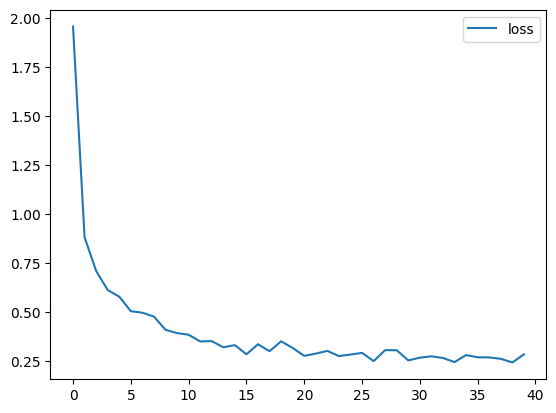

12/12 [==============================] - 0s 15ms/step - loss: 0.2835 - accuracy: 0.8846


In [11]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [13]:
scores=firstModel.evaluate(np.array(valX),np.array(valY))

3/3 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9121


In [15]:
print("Loss:",scores[0])
print("Accuracy",scores[1])

Loss: 0.2068752646446228
Accuracy 0.9120879173278809


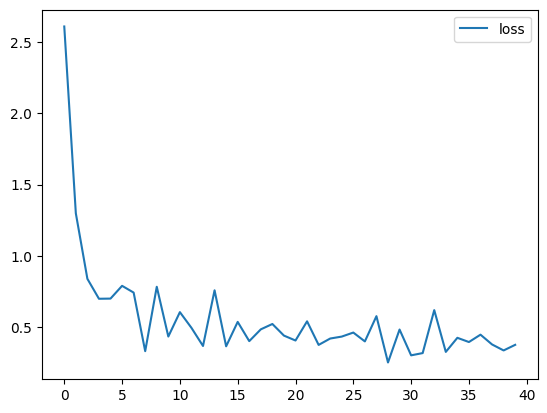

12/12 [==============================] - 1s 48ms/step - loss: 0.3736 - accuracy: 0.8709


In [16]:
secondModel=getModel([30,100,1])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [17]:
scores2=secondModel.evaluate(np.array(valX),np.array(valY))

3/3 [==============================] - 0s 9ms/step - loss: 0.2206 - accuracy: 0.9121


In [29]:
print(scores2)

[0.7291886806488037, 0.8241758346557617]


In [18]:
#Then we'll use a deeper network which will have 5 layers.
thirdModel=getModel([30,50,70,40,1])

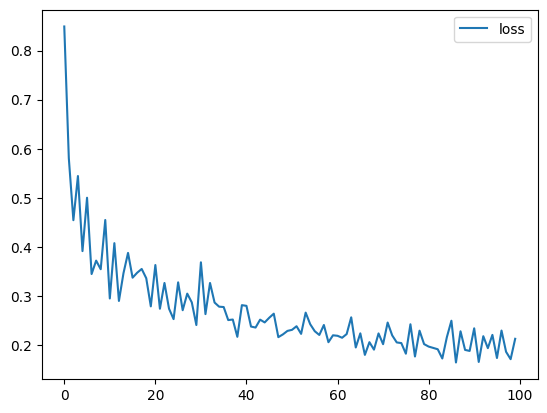

12/12 [==============================] - 0s 20ms/step - loss: 0.2122 - accuracy: 0.9093


In [19]:
thirdModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

In [20]:
scores3=thirdModel.evaluate(np.array(valX),np.array(valY))

3/3 [==============================] - 0s 4ms/step - loss: 0.2973 - accuracy: 0.9011


In [21]:
predY=firstModel.predict(np.array(testX))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

4/4 [==============================] - 0s 2ms/step


In [22]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
m=pd.crosstab(predY,testY)
print("Confusion matrix")
print(m)

Confusion matrix
diagnosis   0   1
row_0            
0          38   0
1           5  71


In [23]:
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Senstivity: 1.0
Specificity: 0.8837209302325582
